### Import bibliotek

In [10]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Ładowanie danych
data = load_breast_cancer()
X = data.data
y = data.target

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# Inicjalizacja i trenowanie modelu
model = LogisticRegression(max_iter=10000, random_state=20)
model.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = model.predict(X_test)

In [36]:
np.unique(y,return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [16]:
# Obliczanie macierzy błędów
cm = confusion_matrix(y_test, y_pred)
print("Macierz błędów:")
print(cm)

Macierz błędów:
[[ 60   4]
 [  5 102]]


In [17]:
import plotly.figure_factory as ff

def plot_confusion_matrix(cm):
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=400, height=400, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [18]:
tn, fp, fn, tp = cm.ravel()
print(f'TN - True Negative: {tn}')
print(f'FP - False Positive: {fp}')
print(f'FN - False Negative: {fn}')
print(f'TP - True Positive: {tp}')

TN - True Negative: 60
FP - False Positive: 4
FN - False Negative: 5
TP - True Positive: 102


In [19]:
# False Positive Rate - Type I error
fpr = fp / (fp + tn)
print(fpr)

0.0625


In [20]:
# False Negative Rate - Type II error
fnr = fn / (fn + tp)
print(fnr)

0.04672897196261682


# Metryki używane do oceny modeli klasyfikacyjnych

## Metryki - Klasyfikacja binarna

### Macierz błędów (Confusion Matrix)

Macierz błędów to tabela, która przedstawia wyniki przewidywań modelu w porównaniu do rzeczywistych klas. W przypadku klasyfikacji binarnej macierz ma postać 2x2 i zawiera cztery główne komponenty:

- **True Positives (TP)**: Liczba poprawnie sklasyfikowanych pozytywnych przypadków.
- **True Negatives (TN)**: Liczba poprawnie sklasyfikowanych negatywnych przypadków.
- **False Positives (FP)**: Liczba negatywnych przypadków, które zostały błędnie sklasyfikowane jako pozytywne.
- **False Negatives (FN)**: Liczba pozytywnych przypadków, które zostały błędnie sklasyfikowane jako negatywne.

![Macierz_pomylek](mp.png)

### Dokładność (Accuracy)

Dokładność to jedna z najprostszych miar oceny wydajności modelu. Oblicza się ją jako stosunek liczby poprawnych przewidywań do całkowitej liczby próbek:

####   $$Accuracy = \frac{correct\ predictions}{total\ predictions} * 100$$

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Dokładność jest przydatna w przypadku zrównoważonych zbiorów danych, ale może być myląca w przypadku niezrównoważonych klas, gdzie jedna klasa dominuje.


In [21]:
# Obliczanie dokładności
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność:", accuracy)

Dokładność: 0.9473684210526315


In [22]:
# Obliczanie dokładności
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Dokładność:", accuracy)

Dokładność: 0.9473684210526315


### Silne niezbalansowanie klas

- 1: 100
- 0: 10000

Mój model predykuje wszystkim, że są zdrowi :) [każdy będzie miał klasę 0]

Rezultat? Acc: 10000/10100

### Precyzja (Precision)

Precyzja mierzy dokładność pozytywnych przewidywań modelu. Jest to stosunek liczby prawdziwie pozytywnych do wszystkich przewidywanych pozytywnych:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

Wysoka precyzja oznacza, że model rzadko klasyfikuje negatywne przypadki jako pozytywne.

In [23]:
# Obliczanie precyzji
precision = precision_score(y_test, y_pred)
print("Precyzja:", precision)

Precyzja: 0.9622641509433962


In [24]:
precision = tp / (tp + fp)
print("Precyzja:", precision)

Precyzja: 0.9622641509433962


### Czułość (Recall)

Czułość, znana również jako współczynnik prawdziwie pozytywny (True Positive Rate), ocenia, ile rzeczywistych pozytywnych przypadków zostało poprawnie wykrytych przez model:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

Wysoka czułość oznacza, że model skutecznie identyfikuje pozytywne przypadki, minimalizując błędy typu II (False Negatives).

In [25]:
# Obliczanie czułości
recall = recall_score(y_test, y_pred)
print("Czułość:", recall)

Czułość: 0.9532710280373832


In [26]:
# Obliczanie czułości
recall = tp / (tp + fn)
print("Czułość:", recall)

Czułość: 0.9532710280373832


### Wskaźnik F1 (F1 Score)

Wskaźnik F1 to średnia harmoniczna precyzji i czułości, która łączy obie metryki w jedną wartość. Jest szczególnie przydatny w sytuacjach, gdy istnieje potrzeba zrównoważenia między precyzją a czułością:

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

Wskaźnik F1 jest użyteczny, gdy klasy są niezrównoważone i ważne jest, aby zarówno precyzja, jak i czułość były na wysokim poziomie.

In [27]:
# Obliczanie wskaźnika F1
f1 = f1_score(y_test, y_pred)
print("Wskaźnik F1:", f1)

Wskaźnik F1: 0.9577464788732394


### Raport klasyfikacji

In [28]:
# raport klasyfikacji
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        64
           1       0.96      0.95      0.96       107

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



## Krzywa ROC i AUC

Krzywa ROC (Receiver Operating Characteristic) to wykres, który przedstawia zależność między czułością (True Positive Rate) a współczynnikiem fałszywie pozytywnym (False Positive Rate) dla różnych progów decyzyjnych modelu.

AUC (Area Under the Curve) to pole pod krzywą ROC, które mierzy zdolność modelu do rozróżniania klas. AUC przyjmuje wartości od 0 do 1:

- AUC = 1 oznacza idealny model, który doskonale rozróżnia klasy.
- AUC = 0,5 oznacza model losowy, który nie ma zdolności do klasyfikacji.
- AUC < 0,5 oznacza model gorzej niż losowy.

Przykład interpretacji: Model ma AUC równe 0,85, co oznacza, że model ma dobrą zdolność do rozróżniania klas. Innymi słowy, prawdopodobieństwo, że model przypisze wyższą wartość prawdopodobieństwa do pozytywnej obserwacji niż do negatywnej, wynosi 0,85.

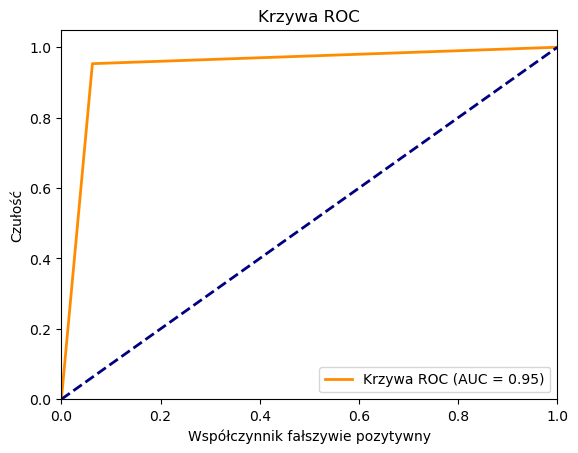

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Zakładając, że mamy już y_true (rzeczywiste etykiety) i y_score (prawdopodobieństwa przewidywane przez model)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Krzywa ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Współczynnik fałszywie pozytywny')
plt.ylabel('Czułość')
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.show()

## Metryki - Klasyfikacja wieloklasowa

In [38]:
y_true = np.array([1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2])
y_pred = np.array([0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2])

from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)

0.7241379310344828

In [39]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[ 6,  1,  0],
       [ 3, 10,  2],
       [ 0,  2,  5]], dtype=int64)

In [40]:
def plot_confusion_matrix(cm):
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1', 'pred_2'], index=['true_2','true_1', 'true_0'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=400, height=400, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.77      0.67      0.71        15
           2       0.71      0.71      0.71         7

    accuracy                           0.72        29
   macro avg       0.72      0.75      0.73        29
weighted avg       0.73      0.72      0.72        29



In [42]:
print(classification_report(y_true, y_pred, target_names=['label_1', 'label_2', 'label_3']))

              precision    recall  f1-score   support

     label_1       0.67      0.86      0.75         7
     label_2       0.77      0.67      0.71        15
     label_3       0.71      0.71      0.71         7

    accuracy                           0.72        29
   macro avg       0.72      0.75      0.73        29
weighted avg       0.73      0.72      0.72        29

